# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Perceptrons

In [2]:
df = pd.read_csv("./input/seeds_dataset.txt", sep='\t', names=['Area', 'Perimeter', 'Compactness', 'Length of kernel', 
                                                               'Width of kernel', 'Asymmetry coefficient', 
                                                               'Length of kernel groove', 'Class'])
df = df.dropna()
df

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [3]:
X = df[['Length of kernel', 'Width of kernel']].to_numpy()
y = df['Class'].to_numpy()
features = list(df.columns.values)[3:5]
target_names = np.array(['Kama', 'Rosa', 'Canadian'])

In [4]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[5.3, 2.9]])

In [5]:
y_pred

array([3], dtype=int64)

Saving figure perceptron_seed_plot


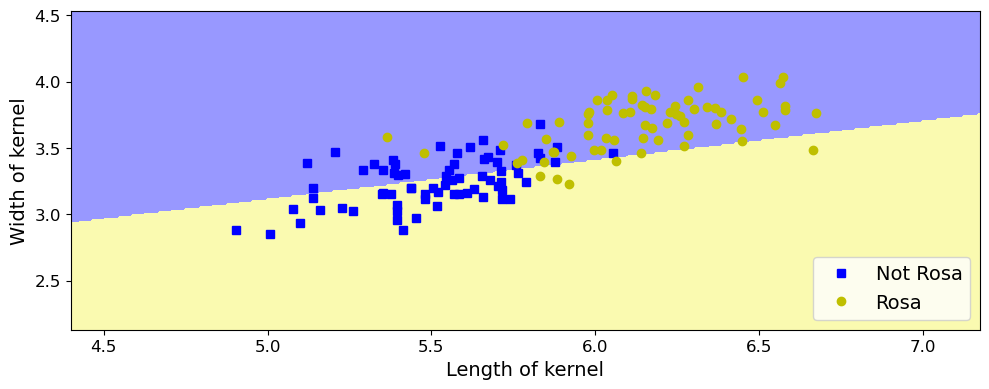

In [6]:
x_min = X[:, 0].min()-0.5
x_max = X[:, 0].max()+0.5
y_min = X[:, 1].min()-0.5
y_max = X[:, 1].max()+0.5
axes = [x_min, x_max, y_min, y_max]

x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Not Rosa")
plt.plot(X[y==2, 0], X[y==2, 1], "yo", label="Rosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Length of kernel", fontsize=14)
plt.ylabel("Width of kernel", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_seed_plot")
plt.show()

# Activation functions

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


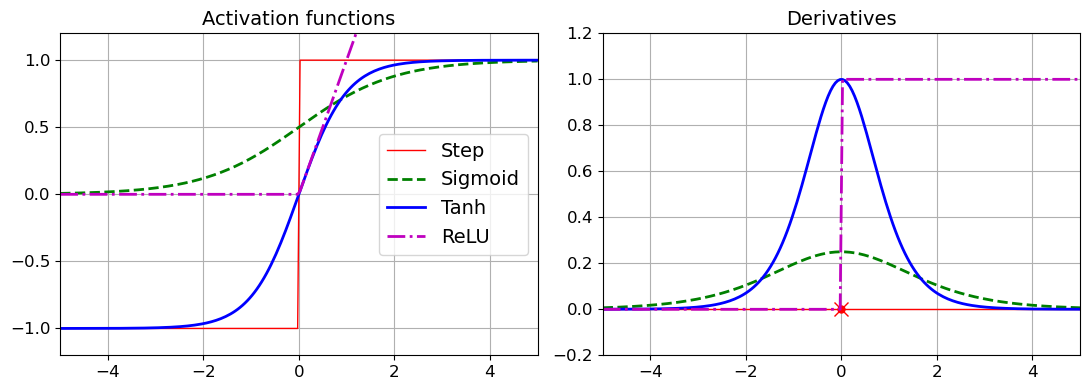

In [8]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [9]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

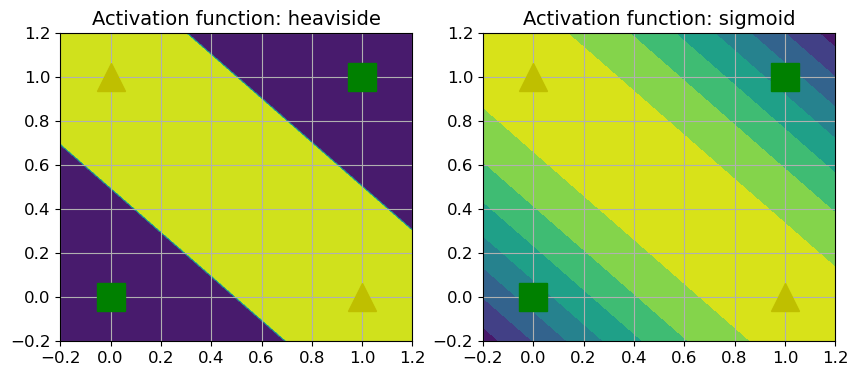

In [10]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# Building an Image Classifier

In [185]:
import tensorflow as tf
from tensorflow import keras

In [186]:
tf.__version__

'2.12.0'

In [187]:
keras.__version__

'2.12.0'

In [188]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [189]:
X_train_full.shape

(60000, 28, 28)

In [190]:
X_train_full.dtype

dtype('uint8')

In [191]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

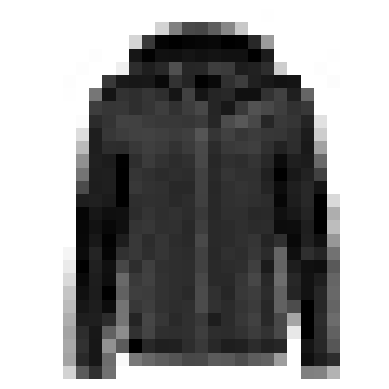

In [192]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [193]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [194]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [195]:
class_names[y_train[0]]

'Coat'

In [196]:
X_valid.shape

(5000, 28, 28)

In [197]:
X_test.shape

(10000, 28, 28)

Saving figure fashion_mnist_plot


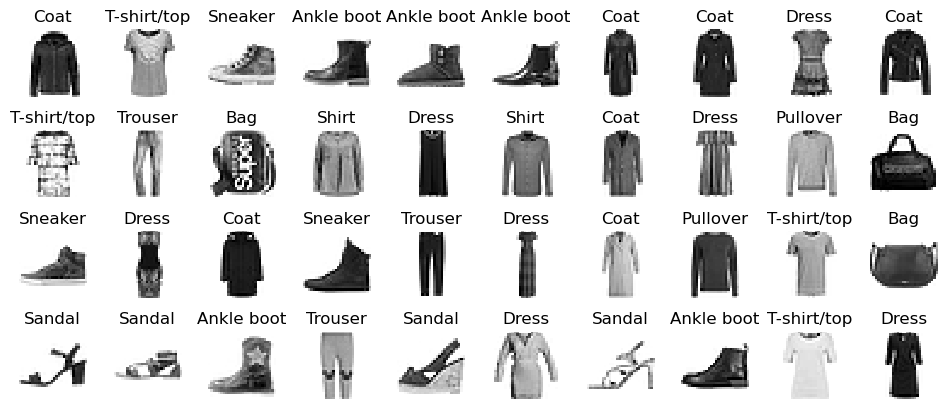

In [198]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [199]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [200]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [201]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [202]:
model.layers

In [203]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


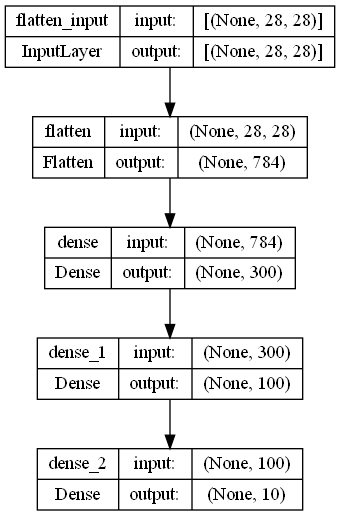

In [204]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [205]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [206]:
model.get_layer(hidden1.name) is hidden1

True

In [207]:
weights, biases = hidden1.get_weights()

In [208]:
weights

array([[-0.03283147, -0.0718137 ,  0.0208552 , ..., -0.02476329,
         0.05945915, -0.04782587],
       [ 0.01999074,  0.04399171,  0.0275388 , ..., -0.055905  ,
         0.0261908 ,  0.02106977],
       [-0.03386117, -0.02386469, -0.04788695, ..., -0.0427547 ,
         0.03791067,  0.04300129],
       ...,
       [-0.04812436,  0.04781517, -0.01814228, ...,  0.05114618,
        -0.05255549, -0.02133229],
       [-0.01130685, -0.05752867,  0.01677552, ...,  0.06156009,
         0.00651914,  0.02199554],
       [-0.04473707, -0.04046569,  0.06025246, ...,  0.06122448,
        -0.04894257, -0.06131424]], dtype=float32)

In [209]:
weights.shape

(784, 300)

In [210]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [211]:
biases.shape

(300,)

In [212]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [213]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7272 - accuracy: 0.7662 - val_loss: 0.5281 - val_accuracy: 0.8192
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4893 - accuracy: 0.8289 - val_loss: 0.4385 - val_accuracy: 0.8506
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4432 - accuracy: 0.8435 - val_loss: 0.5257 - val_accuracy: 0.8040
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4156 - accuracy: 0.8548 - val_loss: 0.3958 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3971 - accuracy: 0.8605 - val_loss: 0.3756 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3784 - accuracy: 0.8673 - val_loss: 0.3761 - val_accuracy: 0.8706
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3659 - accuracy: 0.8709 - val_loss: 0.3673 - val_accuracy:

In [214]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [215]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [216]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


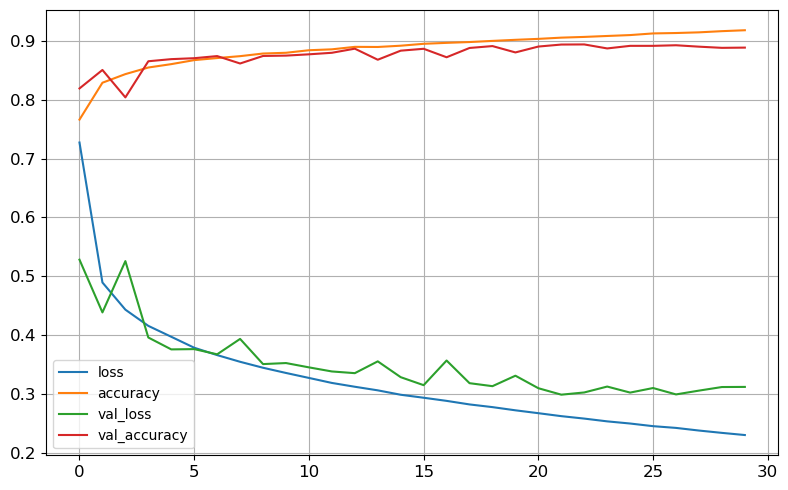

In [217]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
save_fig("keras_learning_curves_plot")
plt.show()

In [218]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3425 - accuracy: 0.8798


[0.3425494134426117, 0.879800021648407]

In [219]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 120ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [220]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 49ms/step


array([9, 2, 1], dtype=int64)

In [221]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [222]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


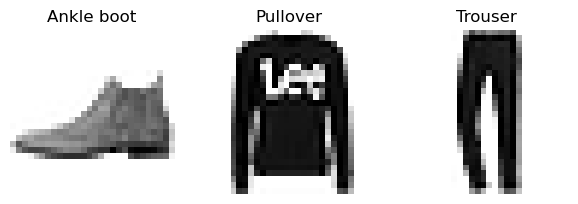

In [223]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# Regression MLP

In [44]:
houses = pd.read_csv("./input/houses/kc_house_data.csv")
houses = houses.drop(["id", "date", "zipcode", "sqft_living15", "sqft_lot15", "sqft_above"], axis=1)
houses

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,0,2009,0,47.6993,-122.346
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,0,2014,0,47.5107,-122.362
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,0,2009,0,47.5944,-122.299
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,0,2004,0,47.5345,-122.069


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = houses.drop("price", axis=1)
target = houses["price"]

X_train_full, X_test, y_train_full, y_test = train_test_split(data, target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [46]:
np.random.seed(42)
tf.random.set_seed(42)

In [51]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-7))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
380/380 [==============================] - 1s 2ms/step - loss: 92612583424.0000 - val_loss: 32861835264.0000
Epoch 2/20
380/380 [==============================] - 1s 3ms/step - loss: 39278166016.0000 - val_loss: 32835500032.0000
Epoch 3/20
380/380 [==============================] - 1s 2ms/step - loss: 37987315712.0000 - val_loss: 31611021312.0000
Epoch 4/20
380/380 [==============================] - 1s 2ms/step - loss: 37551951872.0000 - val_loss: 32163274752.0000
Epoch 5/20
380/380 [==============================] - 1s 2ms/step - loss: 36366827520.0000 - val_loss: 30871140352.0000
Epoch 6/20
380/380 [==============================] - 1s 2ms/step - loss: 35750268928.0000 - val_loss: 29194168320.0000
Epoch 7/20
380/380 [==============================] - 1s 2ms/step - loss: 35184349184.0000 - val_loss: 30053654528.0000
Epoch 8/20
380/380 [==============================] - 1s 2ms/step - loss: 34899853312.0000 - val_loss: 29049223168.0000
Epoch 9/20
380/380 [====================

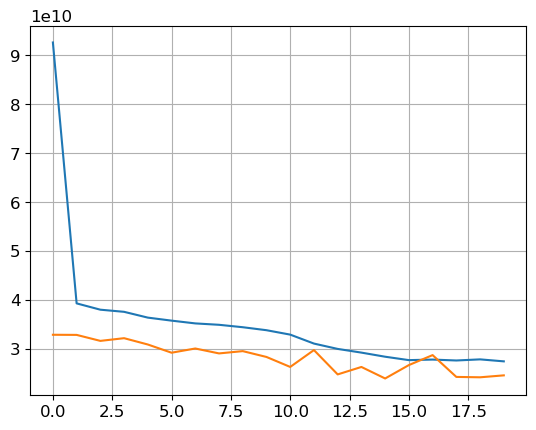

In [54]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()

In [56]:
y_pred

array([[ 389980.22],
       [ 773482.25],
       [1265586.5 ]], dtype=float32)

# Functional API

In [57]:
np.random.seed(42)
tf.random.set_seed(42)

In [58]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [60]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 14)]         0           []                               
                                                                                                  
 dense_13 (Dense)               (None, 30)           450         ['input_1[0][0]']                
                                                                                                  
 dense_14 (Dense)               (None, 30)           930         ['dense_13[0][0]']               
                                                                                                  
 concatenate (Concatenate)      (None, 44)           0           ['input_1[0][0]',                
                                                                  'dense_14[0][0]']           

In [61]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
380/380 [==============================] - 2s 4ms/step - loss: 123932531228672.0000 - val_loss: 250004668416.0000
Epoch 2/20
380/380 [==============================] - 2s 4ms/step - loss: 154858340352.0000 - val_loss: 89584885760.0000
Epoch 3/20
380/380 [==============================] - 1s 3ms/step - loss: 71668858880.0000 - val_loss: 52404752384.0000
Epoch 4/20
380/380 [==============================] - 1s 2ms/step - loss: 51439456256.0000 - val_loss: 42683662336.0000
Epoch 5/20
380/380 [==============================] - 1s 3ms/step - loss: 45682180096.0000 - val_loss: 39629328384.0000
Epoch 6/20
380/380 [==============================] - 1s 3ms/step - loss: 43613642752.0000 - val_loss: 38432206848.0000
Epoch 7/20
380/380 [==============================] - 1s 3ms/step - loss: 42600910848.0000 - val_loss: 37875380224.0000
Epoch 8/20
380/380 [==============================] - 1s 3ms/step - loss: 42057293824.0000 - val_loss: 37682335744.0000
Epoch 9/20
380/380 [==============

In [62]:
np.random.seed(42)
tf.random.set_seed(42)

In [67]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[12], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [68]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-7))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
380/380 [==============================] - 2s 4ms/step - loss: 3668847650783887360.0000 - val_loss: 418175123456.0000
Epoch 2/20
380/380 [==============================] - 1s 3ms/step - loss: 420831461376.0000 - val_loss: 418113224704.0000
Epoch 3/20
380/380 [==============================] - 1s 4ms/step - loss: 420769300480.0000 - val_loss: 418051194880.0000
Epoch 4/20
380/380 [==============================] - 1s 3ms/step - loss: 420707270656.0000 - val_loss: 417989197824.0000
Epoch 5/20
380/380 [==============================] - 1s 3ms/step - loss: 420645044224.0000 - val_loss: 417927102464.0000
Epoch 6/20
380/380 [==============================] - 1s 3ms/step - loss: 420582981632.0000 - val_loss: 417865170944.0000
Epoch 7/20
380/380 [==============================] - 1s 4ms/step - loss: 420520755200.0000 - val_loss: 417803272192.0000
Epoch 8/20
380/380 [==============================] - 1s 4ms/step - loss: 420458692608.0000 - val_loss: 417741340672.0000
Epoch 9/20
380/38

In [69]:
np.random.seed(42)
tf.random.set_seed(42)

In [70]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[12], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [71]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-7))

In [72]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
380/380 [==============================] - 3s 5ms/step - loss: 321608558499363553280.0000 - main_output_loss: 356821394745215418368.0000 - aux_output_loss: 4693040533033975808.0000 - val_loss: 504239718400.0000 - val_main_output_loss: 513908670464.0000 - val_aux_output_loss: 417218789376.0000
Epoch 2/20
380/380 [==============================] - 1s 4ms/step - loss: 507911143424.0000 - main_output_loss: 517685248000.0000 - aux_output_loss: 419943612416.0000 - val_loss: 504167825408.0000 - val_main_output_loss: 513829339136.0000 - val_aux_output_loss: 417214496768.0000
Epoch 3/20
380/380 [==============================] - 1s 3ms/step - loss: 507838988288.0000 - main_output_loss: 517605687296.0000 - aux_output_loss: 419939254272.0000 - val_loss: 504096096256.0000 - val_main_output_loss: 513750204416.0000 - val_aux_output_loss: 417209942016.0000
Epoch 4/20
380/380 [==============================] - 1s 3ms/step - loss: 507767095296.0000 - main_output_loss: 517526061056.0000 - aux

In [73]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 116ms/step


# The subclassing API

In [101]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [102]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-8))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
380/380 [==============================] - 2s 3ms/step - loss: 409433866240.0000 - output_1_loss: 410100465664.0000 - output_2_loss: 403434635264.0000 - val_loss: 416635879424.0000 - val_output_1_loss: 416635682816.0000 - val_output_2_loss: 416636174336.0000
Epoch 2/10
380/380 [==============================] - 2s 4ms/step - loss: 418517286912.0000 - output_1_loss: 418458140672.0000 - output_2_loss: 419048816640.0000 - val_loss: 349588324352.0000 - val_output_1_loss: 348285599744.0000 - val_output_2_loss: 361313206272.0000
Epoch 3/10
380/380 [==============================] - 1s 4ms/step - loss: 383812927488.0000 - output_1_loss: 384617086976.0000 - output_2_loss: 376576770048.0000 - val_loss: 416630407168.0000 - val_output_1_loss: 416630210560.0000 - val_output_2_loss: 416631521280.0000
Epoch 4/10
380/380 [==============================] - 2s 4ms/step - loss: 419351003136.0000 - output_1_loss: 419349364736.0000 - output_2_loss: 419365879808.0000 - val_loss: 416620576768.000

# Saving and Restoring

In [106]:
np.random.seed(42)
tf.random.set_seed(42)

In [107]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[14]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [108]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-9))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
380/380 [==============================] - 2s 3ms/step - loss: 419366240256.0000 - val_loss: 416633126912.0000
Epoch 2/10
380/380 [==============================] - 1s 3ms/step - loss: 419327442944.0000 - val_loss: 416372588544.0000
Epoch 3/10
380/380 [==============================] - 1s 3ms/step - loss: 156005908480.0000 - val_loss: 33132935168.0000
Epoch 4/10
380/380 [==============================] - 1s 3ms/step - loss: 39587889152.0000 - val_loss: 31819745280.0000
Epoch 5/10
380/380 [==============================] - 2s 4ms/step - loss: 37490126848.0000 - val_loss: 31160502272.0000
Epoch 6/10
380/380 [==============================] - 1s 4ms/step - loss: 36591992832.0000 - val_loss: 29605943296.0000
Epoch 7/10
380/380 [==============================] - 1s 3ms/step - loss: 35784085504.0000 - val_loss: 30344947712.0000
Epoch 8/10
380/380 [==============================] - 1s 3ms/step - loss: 35435413504.0000 - val_loss: 29310615552.0000
Epoch 9/10
380/380 [===============

In [109]:
model.save("my_keras_model.h5")

In [110]:
model = keras.models.load_model("my_keras_model.h5")

In [111]:
model.predict(X_new)

1/1 [==============================] - 0s 84ms/step


array([[ 411156.56],
       [ 834993.2 ],
       [1284596.4 ]], dtype=float32)

In [112]:
model.save_weights("my_keras_weights.ckpt")

In [113]:

model.load_weights("my_keras_weights.ckpt")

# Using Callbacks during Training

In [114]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [121]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[14]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [122]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-9))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
380/380 [==============================] - 2s 4ms/step - loss: 419363782656.0000 - val_loss: 416626409472.0000
Epoch 2/10
380/380 [==============================] - 1s 4ms/step - loss: 390022496256.0000 - val_loss: 75754414080.0000
Epoch 3/10
380/380 [==============================] - 1s 4ms/step - loss: 42868326400.0000 - val_loss: 32236830720.0000
Epoch 4/10
380/380 [==============================] - 1s 4ms/step - loss: 38633439232.0000 - val_loss: 31373088768.0000
Epoch 5/10
380/380 [==============================] - 1s 4ms/step - loss: 37041430528.0000 - val_loss: 30999003136.0000
Epoch 6/10
380/380 [==============================] - 1s 4ms/step - loss: 36347629568.0000 - val_loss: 29416437760.0000
Epoch 7/10
380/380 [==============================] - 1s 3ms/step - loss: 35624513536.0000 - val_loss: 30340079616.0000
Epoch 8/10
380/380 [==============================] - 2s 5ms/step - loss: 35453300736.0000 - val_loss: 29275449344.0000
Epoch 9/10
380/380 [=================

In [123]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-9))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
380/380 [==============================] - 3s 4ms/step - loss: 33590843392.0000 - val_loss: 28252104704.0000
Epoch 2/100
380/380 [==============================] - 1s 4ms/step - loss: 34091423744.0000 - val_loss: 29601624064.0000
Epoch 3/100
380/380 [==============================] - 2s 4ms/step - loss: 33832908800.0000 - val_loss: 29960292352.0000
Epoch 4/100
380/380 [==============================] - 2s 5ms/step - loss: 33926649856.0000 - val_loss: 28668166144.0000
Epoch 5/100
380/380 [==============================] - 2s 6ms/step - loss: 33246054400.0000 - val_loss: 29427617792.0000
Epoch 6/100
380/380 [==============================] - 2s 4ms/step - loss: 33206786048.0000 - val_loss: 28006377472.0000
Epoch 7/100
380/380 [==============================] - 2s 4ms/step - loss: 32942436352.0000 - val_loss: 28547796992.0000
Epoch 8/100
380/380 [==============================] - 1s 4ms/step - loss: 33031512064.0000 - val_loss: 28133300224.0000
Epoch 9/100
380/380 [===========

In [124]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [125]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

362/380 [===========================>..] - ETA: 0s - loss: 31209787392.0000
val/train: 0.86
380/380 [==============================] - 1s 4ms/step - loss: 31466897408.0000 - val_loss: 26945218560.0000


# TensorBoard

In [126]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [127]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2023_05_04-00_00_51'

In [128]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [132]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[14]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [133]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
380/380 [==============================] - 2s 4ms/step - loss: 18194974638080.0000 - val_loss: 232254406656.0000
Epoch 2/30
380/380 [==============================] - 2s 4ms/step - loss: 185215156224.0000 - val_loss: 149247295488.0000
Epoch 3/30
380/380 [==============================] - 2s 4ms/step - loss: 142977974272.0000 - val_loss: 130917621760.0000
Epoch 4/30
380/380 [==============================] - 1s 4ms/step - loss: 133807349760.0000 - val_loss: 126860435456.0000
Epoch 5/30
380/380 [==============================] - 2s 4ms/step - loss: 131799343104.0000 - val_loss: 125879803904.0000
Epoch 6/30
380/380 [==============================] - 2s 4ms/step - loss: 131350437888.0000 - val_loss: 125651648512.0000
Epoch 7/30
380/380 [==============================] - 2s 5ms/step - loss: 131260342272.0000 - val_loss: 125597401088.0000
Epoch 8/30
380/380 [==============================] - 2s 5ms/step - loss: 131237576704.0000 - val_loss: 125572587520.0000
Epoch 9/30
380/380 [==

In [134]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [135]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2023_05_04-00_03_28'

In [136]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [137]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[14]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [138]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
380/380 [==============================] - 3s 6ms/step - loss: 2223015687170857306685440.0000 - val_loss: 125590077440.0000
Epoch 2/30
380/380 [==============================] - 2s 5ms/step - loss: 131492585472.0000 - val_loss: 125646618624.0000
Epoch 3/30
380/380 [==============================] - 2s 4ms/step - loss: 131469221888.0000 - val_loss: 125583376384.0000
Epoch 4/30
380/380 [==============================] - 2s 4ms/step - loss: 131484794880.0000 - val_loss: 125558259712.0000
Epoch 5/30
380/380 [==============================] - 2s 4ms/step - loss: 131439796224.0000 - val_loss: 126046289920.0000
Epoch 6/30
380/380 [==============================] - 1s 4ms/step - loss: 131535257600.0000 - val_loss: 125590151168.0000
Epoch 7/30
380/380 [==============================] - 1s 4ms/step - loss: 131454402560.0000 - val_loss: 125580099584.0000
Epoch 8/30
380/380 [==============================] - 2s 5ms/step - loss: 131378806784.0000 - val_loss: 125649960960.0000
Epoch 9/30


In [139]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=0, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



# Hyperparameter Tuning

In [140]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [157]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=1e-7, input_shape=[14]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [158]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\rucla\AppData\Local\Temp\ipykernel_19092\1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [159]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
380/380 [==============================] - 2s 4ms/step - loss: 91662860288.0000 - val_loss: 32558907392.0000
Epoch 2/100
380/380 [==============================] - 1s 3ms/step - loss: 38899130368.0000 - val_loss: 32412465152.0000
Epoch 3/100
380/380 [==============================] - 1s 3ms/step - loss: 37412741120.0000 - val_loss: 31196530688.0000
Epoch 4/100
380/380 [==============================] - 1s 4ms/step - loss: 36889702400.0000 - val_loss: 31165128704.0000
Epoch 5/100
380/380 [==============================] - 1s 3ms/step - loss: 35580002304.0000 - val_loss: 30232111104.0000
Epoch 6/100
380/380 [==============================] - 1s 4ms/step - loss: 35085594624.0000 - val_loss: 28954568704.0000
Epoch 7/100
380/380 [==============================] - 1s 3ms/step - loss: 34590769152.0000 - val_loss: 29528078336.0000
Epoch 8/100
380/380 [==============================] - 1s 3ms/step - loss: 34017636352.0000 - val_loss: 29033486336.0000
Epoch 9/100
380/380 [===========

In [160]:
mse_test = keras_reg.score(X_test, y_test)

169/169 [==============================] - 0s 3ms/step - loss: 33888225280.0000


In [162]:
y_pred = keras_reg.predict(X_new)

1/1 [==============================] - 0s 45ms/step


In [163]:
np.random.seed(42)
tf.random.set_seed(42)

In [166]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(1e-9, 1e-8)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
254/254 [==============================] - 2s 4ms/step - loss: 414840684544.0000 - val_loss: 416599998464.0000
Epoch 2/100
254/254 [==============================] - 1s 4ms/step - loss: 414328291328.0000 - val_loss: 414365384704.0000
Epoch 3/100
254/254 [==============================] - 1s 4ms/step - loss: 385063157760.0000 - val_loss: 305820827648.0000
Epoch 4/100
254/254 [==============================] - 1s 4ms/step - loss: 177280843776.0000 - val_loss: 115396894720.0000
Epoch 5/100
254/254 [==============================] - 1s 4ms/step - loss: 100248313856.0000 - val_loss: 77946019840.0000
Epoch 6/100
254/254 [==============================] - 1s 4ms/step - loss: 62437462016.0000 - val_loss: 43202715648.0000
Epoch 7/100
254/254 [==============================] - 1s 3ms/step - loss: 41605566464.0000 - val_loss: 36005548032.0000
Epoch 8/100
254/254 [==============================] - 1s 4ms/step - loss: 38348517

254/254 [==============================] - 1s 4ms/step - loss: 32655900672.0000 - val_loss: 30218754048.0000
Epoch 68/100
254/254 [==============================] - 1s 4ms/step - loss: 32708114432.0000 - val_loss: 30023251968.0000
Epoch 69/100
254/254 [==============================] - 1s 5ms/step - loss: 32671799296.0000 - val_loss: 29982361600.0000
Epoch 70/100
254/254 [==============================] - 1s 5ms/step - loss: 32706897920.0000 - val_loss: 29951049728.0000
Epoch 71/100
254/254 [==============================] - 1s 5ms/step - loss: 32692379648.0000 - val_loss: 29907218432.0000
Epoch 72/100
254/254 [==============================] - 1s 5ms/step - loss: 32497848320.0000 - val_loss: 30005934080.0000
Epoch 73/100
254/254 [==============================] - 2s 7ms/step - loss: 32629737472.0000 - val_loss: 29967773696.0000
Epoch 74/100
254/254 [==============================] - 1s 4ms/step - loss: 32583100416.0000 - val_loss: 30044260352.0000
Epoch 75/100
254/254 [===============

Epoch 33/100
254/254 [==============================] - 1s 3ms/step - loss: 34636955648.0000 - val_loss: 31274360832.0000
Epoch 34/100
254/254 [==============================] - 1s 2ms/step - loss: 34655137792.0000 - val_loss: 31076642816.0000
Epoch 35/100
254/254 [==============================] - 1s 2ms/step - loss: 34531803136.0000 - val_loss: 30970015744.0000
Epoch 36/100
254/254 [==============================] - 1s 3ms/step - loss: 34212116480.0000 - val_loss: 30881198080.0000
Epoch 37/100
254/254 [==============================] - 1s 3ms/step - loss: 34286516224.0000 - val_loss: 30735687680.0000
Epoch 38/100
254/254 [==============================] - 1s 3ms/step - loss: 34095906816.0000 - val_loss: 30760429568.0000
Epoch 39/100
254/254 [==============================] - 1s 3ms/step - loss: 34027491328.0000 - val_loss: 30500345856.0000
Epoch 40/100
254/254 [==============================] - 1s 3ms/step - loss: 33868503040.0000 - val_loss: 30583390208.0000
Epoch 41/100
254/254 [==

127/127 [==============================] - 0s 2ms/step - loss: 33715288064.0000
[CV] END learning_rate=5.219125807124366e-09, n_hidden=1, n_neurons=28; total time= 1.6min
Epoch 1/100
254/254 [==============================] - 3s 4ms/step - loss: 425867935744.0000 - val_loss: 416604684288.0000
Epoch 2/100
254/254 [==============================] - 1s 3ms/step - loss: 425396961280.0000 - val_loss: 414566842368.0000
Epoch 3/100
254/254 [==============================] - 1s 3ms/step - loss: 395719311360.0000 - val_loss: 304865312768.0000
Epoch 4/100
254/254 [==============================] - 1s 3ms/step - loss: 179785924608.0000 - val_loss: 117261795328.0000
Epoch 5/100
254/254 [==============================] - 1s 3ms/step - loss: 106294788096.0000 - val_loss: 81588748288.0000
Epoch 6/100
254/254 [==============================] - 1s 3ms/step - loss: 69553143808.0000 - val_loss: 44627955712.0000
Epoch 7/100
254/254 [==============================] - 1s 4ms/step - loss: 47050768384.0000 - 

Epoch 66/100
254/254 [==============================] - 1s 3ms/step - loss: 34756034560.0000 - val_loss: 29319180288.0000
Epoch 67/100
254/254 [==============================] - 1s 3ms/step - loss: 34675630080.0000 - val_loss: 29367449600.0000
Epoch 68/100
254/254 [==============================] - 1s 3ms/step - loss: 34709729280.0000 - val_loss: 29275760640.0000
Epoch 69/100
254/254 [==============================] - 1s 3ms/step - loss: 34580279296.0000 - val_loss: 29358022656.0000
Epoch 70/100
254/254 [==============================] - 1s 5ms/step - loss: 34559111168.0000 - val_loss: 29216532480.0000
Epoch 71/100
254/254 [==============================] - 1s 4ms/step - loss: 34474762240.0000 - val_loss: 29438906368.0000
Epoch 72/100
254/254 [==============================] - 1s 4ms/step - loss: 34493427712.0000 - val_loss: 29235992576.0000
Epoch 73/100
254/254 [==============================] - 1s 5ms/step - loss: 34458132480.0000 - val_loss: 29207490560.0000
Epoch 74/100
254/254 [==

254/254 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 5/100
254/254 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 6/100
254/254 [==============================] - 2s 6ms/step - loss: nan - val_loss: nan
Epoch 7/100
254/254 [==============================] - 1s 5ms/step - loss: nan - val_loss: nan
Epoch 8/100
254/254 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 9/100
254/254 [==============================] - 1s 4ms/step - loss: nan - val_loss: nan
Epoch 10/100
127/127 [==============================] - 0s 2ms/step - loss: nan
[CV] END learning_rate=8.370611591692152e-09, n_hidden=3, n_neurons=68; total time=  13.3s
Epoch 1/100
254/254 [==============================] - 2s 6ms/step - loss: nan - val_loss: nan
Epoch 2/100
254/254 [==============================] - 1s 5ms/step - loss: nan - val_loss: nan
Epoch 3/100
254/254 [==============================] - 1s 4ms/step - loss: nan - 

Epoch 10/100
254/254 [==============================] - 1s 5ms/step - loss: 386686812160.0000 - val_loss: 416638435328.0000
Epoch 11/100
254/254 [==============================] - 1s 5ms/step - loss: 417374306304.0000 - val_loss: 416633880576.0000
Epoch 12/100
254/254 [==============================] - 1s 5ms/step - loss: 417371226112.0000 - val_loss: 416631422976.0000
Epoch 13/100
254/254 [==============================] - 1s 4ms/step - loss: 417369096192.0000 - val_loss: 416629784576.0000
Epoch 14/100
254/254 [==============================] - 1s 4ms/step - loss: 417367982080.0000 - val_loss: 416628768768.0000
Epoch 15/100
254/254 [==============================] - 1s 6ms/step - loss: 417366999040.0000 - val_loss: 416627916800.0000
Epoch 16/100
254/254 [==============================] - 1s 4ms/step - loss: 323559489536.0000 - val_loss: 416650559488.0000
Epoch 17/100
127/127 [==============================] - 0s 2ms/step - loss: 423339982848.0000
[CV] END learning_rate=3.2525345669845

254/254 [==============================] - 2s 5ms/step - loss: 336380592128.0000 - val_loss: 438559932416.0000
Epoch 2/100
254/254 [==============================] - 1s 4ms/step - loss: 228726734848.0000 - val_loss: 416523255808.0000
Epoch 3/100
254/254 [==============================] - 1s 4ms/step - loss: 294207193088.0000 - val_loss: 416641089536.0000
Epoch 4/100
254/254 [==============================] - 1s 4ms/step - loss: 407017652224.0000 - val_loss: 158506205184.0000
Epoch 5/100
254/254 [==============================] - 1s 4ms/step - loss: 357125357568.0000 - val_loss: 416632537088.0000
Epoch 6/100
254/254 [==============================] - 1s 4ms/step - loss: 417369948160.0000 - val_loss: 416629325824.0000
Epoch 7/100
254/254 [==============================] - 1s 3ms/step - loss: 417367162880.0000 - val_loss: 416627425280.0000
Epoch 8/100
254/254 [==============================] - 1s 4ms/step - loss: 417365098496.0000 - val_loss: 416625295360.0000
Epoch 9/100
254/254 [=======

254/254 [==============================] - 1s 4ms/step - loss: 28382824448.0000 - val_loss: 26502524928.0000
Epoch 41/100
254/254 [==============================] - 1s 4ms/step - loss: 27185954816.0000 - val_loss: 24737843200.0000
Epoch 42/100
254/254 [==============================] - 1s 4ms/step - loss: 26674499584.0000 - val_loss: 41031806976.0000
Epoch 43/100
254/254 [==============================] - 1s 5ms/step - loss: 26585624576.0000 - val_loss: 23152963584.0000
Epoch 44/100
254/254 [==============================] - 1s 5ms/step - loss: 26267179008.0000 - val_loss: 25363941376.0000
Epoch 45/100
254/254 [==============================] - 1s 4ms/step - loss: 25636179968.0000 - val_loss: 22733537280.0000
Epoch 46/100
254/254 [==============================] - 1s 4ms/step - loss: 25588035584.0000 - val_loss: 25964535808.0000
Epoch 47/100
254/254 [==============================] - 1s 4ms/step - loss: 24953333760.0000 - val_loss: 23315945472.0000
Epoch 48/100
254/254 [===============

Epoch 27/100
254/254 [==============================] - 1s 3ms/step - loss: 26854168576.0000 - val_loss: 25823485952.0000
Epoch 28/100
254/254 [==============================] - 1s 5ms/step - loss: 27350702080.0000 - val_loss: 24999358464.0000
Epoch 29/100
254/254 [==============================] - 1s 4ms/step - loss: 25533798400.0000 - val_loss: 29612832768.0000
Epoch 30/100
254/254 [==============================] - 1s 4ms/step - loss: 26202417152.0000 - val_loss: 28700665856.0000
Epoch 31/100
254/254 [==============================] - 1s 3ms/step - loss: 25861439488.0000 - val_loss: 43188457472.0000
Epoch 32/100
254/254 [==============================] - 1s 4ms/step - loss: 24865888256.0000 - val_loss: 22872342528.0000
Epoch 33/100
254/254 [==============================] - 1s 3ms/step - loss: 25250361344.0000 - val_loss: 22740373504.0000
Epoch 34/100
254/254 [==============================] - 1s 4ms/step - loss: 24951531520.0000 - val_loss: 24910338048.0000
Epoch 35/100
254/254 [==

Epoch 39/100
254/254 [==============================] - 1s 2ms/step - loss: 32214956032.0000 - val_loss: 27890053120.0000
Epoch 40/100
254/254 [==============================] - 1s 2ms/step - loss: 31036753920.0000 - val_loss: 29423996928.0000
Epoch 41/100
254/254 [==============================] - 1s 3ms/step - loss: 31343857664.0000 - val_loss: 32198086656.0000
Epoch 42/100
254/254 [==============================] - 1s 3ms/step - loss: 30402670592.0000 - val_loss: 30452115456.0000
Epoch 43/100
254/254 [==============================] - 1s 6ms/step - loss: 30484994048.0000 - val_loss: 34688204800.0000
Epoch 44/100
254/254 [==============================] - 1s 4ms/step - loss: 30783111168.0000 - val_loss: 30099275776.0000
Epoch 45/100
254/254 [==============================] - 1s 3ms/step - loss: 31236161536.0000 - val_loss: 30672861184.0000
Epoch 46/100
254/254 [==============================] - 1s 5ms/step - loss: 31292391424.0000 - val_loss: 30331758592.0000
Epoch 47/100
254/254 [==

254/254 [==============================] - 1s 3ms/step - loss: 34703663104.0000 - val_loss: 32011061248.0000
Epoch 56/100
254/254 [==============================] - 1s 5ms/step - loss: 34643111936.0000 - val_loss: 31947614208.0000
Epoch 57/100
254/254 [==============================] - 2s 7ms/step - loss: 34563133440.0000 - val_loss: 31926577152.0000
Epoch 58/100
254/254 [==============================] - 1s 4ms/step - loss: 34538819584.0000 - val_loss: 31860125696.0000
Epoch 59/100
254/254 [==============================] - 2s 6ms/step - loss: 34484002816.0000 - val_loss: 31773417472.0000
Epoch 60/100
254/254 [==============================] - 4s 17ms/step - loss: 34460205056.0000 - val_loss: 31726827520.0000
Epoch 61/100
254/254 [==============================] - 1s 4ms/step - loss: 34342762496.0000 - val_loss: 31714549760.0000
Epoch 62/100
254/254 [==============================] - 1s 4ms/step - loss: 34327541760.0000 - val_loss: 31611604992.0000
Epoch 63/100
254/254 [==============

254/254 [==============================] - 1s 4ms/step - loss: 39041257472.0000 - val_loss: 35305689088.0000
Epoch 21/100
254/254 [==============================] - 1s 4ms/step - loss: 38910472192.0000 - val_loss: 35191418880.0000
Epoch 22/100
254/254 [==============================] - 1s 4ms/step - loss: 38656753664.0000 - val_loss: 34959962112.0000
Epoch 23/100
254/254 [==============================] - 1s 4ms/step - loss: 38552858624.0000 - val_loss: 34880577536.0000
Epoch 24/100
254/254 [==============================] - 1s 4ms/step - loss: 38451765248.0000 - val_loss: 34789040128.0000
Epoch 25/100
254/254 [==============================] - 2s 6ms/step - loss: 38249811968.0000 - val_loss: 34673643520.0000
Epoch 26/100
254/254 [==============================] - 1s 4ms/step - loss: 38177046528.0000 - val_loss: 34563321856.0000
Epoch 27/100
254/254 [==============================] - 1s 3ms/step - loss: 38024409088.0000 - val_loss: 34437939200.0000
Epoch 28/100
254/254 [===============

254/254 [==============================] - 1s 4ms/step - loss: 33746083840.0000 - val_loss: 30495516672.0000
Epoch 88/100
254/254 [==============================] - 1s 4ms/step - loss: 33704325120.0000 - val_loss: 30436050944.0000
Epoch 89/100
254/254 [==============================] - 1s 6ms/step - loss: 33658564608.0000 - val_loss: 30402111488.0000
Epoch 90/100
254/254 [==============================] - 1s 4ms/step - loss: 33609402368.0000 - val_loss: 30376224768.0000
Epoch 91/100
254/254 [==============================] - 1s 5ms/step - loss: 33588008960.0000 - val_loss: 30339436544.0000
Epoch 92/100
254/254 [==============================] - 1s 4ms/step - loss: 33535127552.0000 - val_loss: 30347454464.0000
Epoch 93/100
254/254 [==============================] - 1s 4ms/step - loss: 33499279360.0000 - val_loss: 30305671168.0000
Epoch 94/100
254/254 [==============================] - 1s 4ms/step - loss: 33462878208.0000 - val_loss: 30272823296.0000
Epoch 95/100
254/254 [===============

Epoch 53/100
254/254 [==============================] - 1s 3ms/step - loss: 38279548928.0000 - val_loss: 31552507904.0000
Epoch 54/100
254/254 [==============================] - 1s 3ms/step - loss: 38251315200.0000 - val_loss: 31461376000.0000
Epoch 55/100
254/254 [==============================] - 1s 3ms/step - loss: 38138740736.0000 - val_loss: 31408687104.0000
Epoch 56/100
254/254 [==============================] - 1s 2ms/step - loss: 38077251584.0000 - val_loss: 31347361792.0000
Epoch 57/100
254/254 [==============================] - 1s 2ms/step - loss: 38008184832.0000 - val_loss: 31317895168.0000
Epoch 58/100
254/254 [==============================] - 1s 2ms/step - loss: 37928620032.0000 - val_loss: 31258206208.0000
Epoch 59/100
254/254 [==============================] - 1s 2ms/step - loss: 37861359616.0000 - val_loss: 31181516800.0000
Epoch 60/100
254/254 [==============================] - 1s 2ms/step - loss: 37777252352.0000 - val_loss: 31130058752.0000
Epoch 61/100
254/254 [==

254/254 [==============================] - 1s 3ms/step - loss: 414828724224.0000 - val_loss: 416615202816.0000
Epoch 19/100
254/254 [==============================] - 1s 3ms/step - loss: 414827479040.0000 - val_loss: 416614023168.0000
Epoch 20/100
254/254 [==============================] - 1s 3ms/step - loss: 414826037248.0000 - val_loss: 416612712448.0000
Epoch 21/100
254/254 [==============================] - 1s 3ms/step - loss: 414824857600.0000 - val_loss: 416611565568.0000
Epoch 22/100
254/254 [==============================] - 1s 3ms/step - loss: 414823546880.0000 - val_loss: 416610222080.0000
Epoch 23/100
254/254 [==============================] - 1s 3ms/step - loss: 414822563840.0000 - val_loss: 416609009664.0000
Epoch 24/100
254/254 [==============================] - 1s 3ms/step - loss: 414821253120.0000 - val_loss: 416607830016.0000
Epoch 25/100
254/254 [==============================] - 1s 3ms/step - loss: 414819844096.0000 - val_loss: 416606552064.0000
Epoch 26/100
254/254 

254/254 [==============================] - 1s 3ms/step - loss: 414748377088.0000 - val_loss: 416533577728.0000
Epoch 85/100
254/254 [==============================] - 1s 2ms/step - loss: 414747099136.0000 - val_loss: 416532168704.0000
Epoch 86/100
254/254 [==============================] - 1s 5ms/step - loss: 414745853952.0000 - val_loss: 416530989056.0000
Epoch 87/100
254/254 [==============================] - 1s 3ms/step - loss: 414744674304.0000 - val_loss: 416529874944.0000
Epoch 88/100
254/254 [==============================] - 1s 3ms/step - loss: 414743658496.0000 - val_loss: 416528433152.0000
Epoch 89/100
254/254 [==============================] - 1s 3ms/step - loss: 414742315008.0000 - val_loss: 416527319040.0000
Epoch 90/100
254/254 [==============================] - 1s 3ms/step - loss: 414741037056.0000 - val_loss: 416526008320.0000
Epoch 91/100
254/254 [==============================] - 1s 3ms/step - loss: 414739857408.0000 - val_loss: 416524828672.0000
Epoch 92/100
254/254 

Epoch 49/100
254/254 [==============================] - 1s 5ms/step - loss: 417316536320.0000 - val_loss: 416576536576.0000
Epoch 50/100
254/254 [==============================] - 2s 6ms/step - loss: 417315356672.0000 - val_loss: 416575324160.0000
Epoch 51/100
254/254 [==============================] - 2s 9ms/step - loss: 417314078720.0000 - val_loss: 416574144512.0000
Epoch 52/100
254/254 [==============================] - 1s 3ms/step - loss: 417312866304.0000 - val_loss: 416572866560.0000
Epoch 53/100
254/254 [==============================] - 1s 5ms/step - loss: 417311653888.0000 - val_loss: 416571490304.0000
Epoch 54/100
254/254 [==============================] - 1s 4ms/step - loss: 417310408704.0000 - val_loss: 416570441728.0000
Epoch 55/100
254/254 [==============================] - 1s 5ms/step - loss: 417309097984.0000 - val_loss: 416569032704.0000
Epoch 56/100
254/254 [==============================] - 1s 3ms/step - loss: 417307852800.0000 - val_loss: 416567787520.0000
Epoch 57

Epoch 14/100
254/254 [==============================] - 1s 4ms/step - loss: 425859350528.0000 - val_loss: 416619790336.0000
Epoch 15/100
254/254 [==============================] - 1s 3ms/step - loss: 425858039808.0000 - val_loss: 416618414080.0000
Epoch 16/100
254/254 [==============================] - 1s 4ms/step - loss: 425856958464.0000 - val_loss: 416617267200.0000
Epoch 17/100
254/254 [==============================] - 1s 3ms/step - loss: 425855614976.0000 - val_loss: 416615923712.0000
Epoch 18/100
254/254 [==============================] - 1s 3ms/step - loss: 425854238720.0000 - val_loss: 416614645760.0000
Epoch 19/100
254/254 [==============================] - 1s 3ms/step - loss: 425853190144.0000 - val_loss: 416613367808.0000
Epoch 20/100
254/254 [==============================] - 1s 4ms/step - loss: 425851879424.0000 - val_loss: 416612122624.0000
Epoch 21/100
254/254 [==============================] - 1s 3ms/step - loss: 425850601472.0000 - val_loss: 416610779136.0000
Epoch 22

254/254 [==============================] - 1s 2ms/step - loss: 425775923200.0000 - val_loss: 416536363008.0000
Epoch 81/100
254/254 [==============================] - 1s 2ms/step - loss: 425774612480.0000 - val_loss: 416535117824.0000
Epoch 82/100
254/254 [==============================] - 1s 2ms/step - loss: 425773334528.0000 - val_loss: 416534003712.0000
Epoch 83/100
254/254 [==============================] - 1s 2ms/step - loss: 425772122112.0000 - val_loss: 416532791296.0000
Epoch 84/100
254/254 [==============================] - 1s 2ms/step - loss: 425770811392.0000 - val_loss: 416531382272.0000
Epoch 85/100
254/254 [==============================] - 1s 2ms/step - loss: 425769533440.0000 - val_loss: 416530104320.0000
Epoch 86/100
254/254 [==============================] - 1s 2ms/step - loss: 425768386560.0000 - val_loss: 416528924672.0000
Epoch 87/100
254/254 [==============================] - 1s 2ms/step - loss: 425767043072.0000 - val_loss: 416527482880.0000
Epoch 88/100
254/254 

C:\Users\rucla\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [-3.29985126e+10             nan             nan -4.19358223e+11
             nan -4.19361893e+11 -2.70512005e+10 -3.45749142e+10
 -4.19244037e+11 -4.19351211e+11]
  warnings.warn(


380/380 [==============================] - 2s 4ms/step - loss: 419366436864.0000 - val_loss: 416634142720.0000
Epoch 2/100
380/380 [==============================] - 2s 6ms/step - loss: 419348152320.0000 - val_loss: 416537509888.0000
Epoch 3/100
380/380 [==============================] - 1s 3ms/step - loss: 192441679872.0000 - val_loss: 33725243392.0000
Epoch 4/100
380/380 [==============================] - 1s 3ms/step - loss: 40188653568.0000 - val_loss: 31600048128.0000
Epoch 5/100
380/380 [==============================] - 1s 3ms/step - loss: 37823524864.0000 - val_loss: 31199172608.0000
Epoch 6/100
380/380 [==============================] - 1s 4ms/step - loss: 36959731712.0000 - val_loss: 29648678912.0000
Epoch 7/100
380/380 [==============================] - 1s 3ms/step - loss: 36264378368.0000 - val_loss: 30648320000.0000
Epoch 8/100
380/380 [==============================] - 2s 5ms/step - loss: 36065710080.0000 - val_loss: 29679958016.0000
Epoch 9/100
380/380 [==================

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000022AA6C33D60>,
                   param_distributions={'learning_rate': [4.558094939010259e-09,
                                                          4.9235297280952e-09,
                                                          7.0663582509904126e-09,
                                                          1.7769205453966901e-09,
                                                          3.0862063722962985e-09,
                                                          1.6642150372451894e-09,
                                                          9.720039011957845e-09,
                                                          8.791426299948918e-09,
                                                          1.0950320016815956e-09,
                                                          5.0766...
                                                          2.97998595125

In [167]:
rnd_search_cv.best_params_

{'n_neurons': 15, 'n_hidden': 2, 'learning_rate': 1.077770220270745e-09}

In [168]:
rnd_search_cv.best_score_

-27051200512.0

In [169]:
rnd_search_cv.best_estimator_

In [170]:
rnd_search_cv.score(X_test, y_test)

169/169 [==============================] - 0s 1ms/step - loss: 34219796480.0000


-34219796480.0

In [171]:
model = rnd_search_cv.best_estimator_.model
model

In [172]:
model.evaluate(X_test, y_test)

169/169 [==============================] - 0s 2ms/step - loss: 34219796480.0000


34219796480.0